## Introduction :
It contains information about the marketing campaign impact of a bank specifically through telemarketing. I Dataset have 17 attributes including one dependent attribute and there are 45211 instances/datapoints. So we have 16 predictor/independent attributes and 1 dependent attribute.
## Description:
The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

| Column Name      | Data type |
| ----------- | ----------- |
| age     | Discrete       |
| job   | Category       |
| marital     | Category |
| education      |  Category      |
| default   | Category        |
| balance      | Continuous |
| housing      | Category       |
| loan   | Category        |
| contact      | Category |
| day      | discrete       |
| month   | Category        |
| duration      | Discrete |
| campaign      | Discrete       |
| pdays   | Discrete        |
| previous | Discrete |
| poutcome | Category |
| y | Category |

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
#show all column
pd.pandas.set_option('display.max_columns',None)

In [2]:
#read data
df1 = pd.read_csv("C:/Users/test/Downloads/datasets/train.csv", sep=';')
df2 = pd.read_csv("C:/Users/test/Downloads/datasets/test.csv", sep=';')

In [3]:
#Merge data
bank_data = pd.concat([df1,df2], axis=0)

In [4]:
#First 10 rows
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [6]:
#describe data
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
#null values
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
#duplicate values
bank_data.duplicated().sum()

4521

In [9]:
#shw duplicates
bank_data[bank_data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [10]:
#drop duplicates
bank_data.drop_duplicates(inplace=True)

In [11]:
#shape of data
bank_data.shape

(45211, 17)

In [12]:
#job valuecounts
bank_data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [13]:
#Day valuecounts
bank_data['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [14]:
#rows where day is more than 31
bank_data[bank_data['day']>31]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [15]:
#convert unknown job to NaN
bank_data['job'].replace('unknown', np.nan, inplace=True)

In [16]:
#marital valuecounts
bank_data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [17]:
#education valuecounts
bank_data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [18]:
#convrt unknown education to NaN
bank_data['education'].replace(['unknown'], 'others', inplace=True)

In [19]:
#default valuecounts
bank_data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [20]:
#housing valuecounts
bank_data['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [21]:
#loan valuecounts
bank_data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [22]:
#contact valuecounts
bank_data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [23]:
#convrt unknown contact to NaN
bank_data['contact'].replace(['unknown'], np.nan, inplace=True)

In [24]:
#month valuecounts
bank_data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [25]:
#poutcome valuecounts
bank_data['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [26]:
#convrt unknown poutcome to NaN
bank_data['poutcome'].replace(['unknown'], np.nan, inplace=True)

In [27]:
bank_data['poutcome'].replace(['other'], "nonexistent", inplace=True)

In [28]:
#rows where duration is 0 
bank_data[bank_data['duration'] == 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53,management,married,primary,no,351,yes,no,NaN,27,may,0,4,-1,0,NaN,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,NaN,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,NaN,no


In [29]:
#drop these above rows
bank_data.drop(bank_data[bank_data['duration'] == 0].index, inplace=True)

In [30]:
#rows where job in NaN
df = bank_data[bank_data['job'].isnull()]

In [31]:
bank_data['job'].value_counts()

blue-collar      9732
management       9457
technician       7596
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1486
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [32]:
#fill job as retired in df where age is greater than 55
df.loc[df['age'] > 55, 'job'] = 'retired'

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [33]:
#drop null values in job
bank_data.dropna(subset=['job'], inplace=True) 

In [34]:
#concat df and bank_data
bank_data = pd.concat([df, bank_data], axis=0)

In [35]:
#drop null values in job
bank_data.dropna(subset=['job'], inplace=True)

<AxesSubplot:>

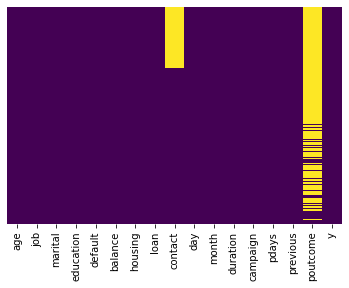

In [36]:
#missing values
sns.heatmap(bank_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
#rows where contact is null
df1 = bank_data[bank_data['contact'].isnull()]

In [38]:
#drop null vales in contact
bank_data.dropna(subset=['contact'], inplace=True)

In [39]:
#rows where education is primary and others
df2 = bank_data[(bank_data['age'] > 50) & (bank_data['education'] == 'primary')]
df2['contact'].value_counts()

cellular     1221
telephone     407
Name: contact, dtype: int64

In [40]:
#fill contact as telephone where age is greater than 50 and education is primary
df1.loc[(df1['age'] > 50) |(df1['education'] == 'primary') ,'contact'] = 'telephone'

In [41]:
#fill nan in contact as cellular
df1['contact'].fillna('cellular', inplace=True)

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [42]:
#concat df1 and bank_data
bank_data = pd.concat([df1, bank_data], axis=0)

In [43]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
354,59,retired,divorced,others,no,27,no,no,telephone,5,may,347,3,-1,0,NaN,no
2046,57,retired,married,others,no,106,no,no,telephone,12,may,836,4,-1,0,NaN,no
2723,58,retired,divorced,secondary,no,3111,yes,no,telephone,13,may,166,2,-1,0,NaN,no
6966,57,retired,married,others,no,327,yes,no,telephone,28,may,74,2,-1,0,NaN,no
9002,59,retired,married,others,no,3940,no,no,telephone,5,jun,48,2,-1,0,NaN,no


In [44]:
#rows 
df3 = bank_data[(bank_data['balance'] < 1000 ) & (bank_data['job']=='management')]
df3['poutcome'].value_counts()

failure        612
nonexistent    225
success        198
Name: poutcome, dtype: int64

In [45]:
#rows 
df3 = bank_data[(bank_data['age'] > 60) & (bank_data['balance'] > 500)]
df3['poutcome'].value_counts()

success        154
failure        123
nonexistent     58
Name: poutcome, dtype: int64

In [46]:
#rows where default is yes and balance is less than 1000
df3 = bank_data[(bank_data['default'] == 'no') & (bank_data['loan'] == 'yes') & (bank_data['housing'] == 'yes')]
df3['poutcome'].value_counts()

failure        603
nonexistent    188
success         42
Name: poutcome, dtype: int64

In [47]:
#rows where y is yes
df3 = bank_data[(bank_data['y'] == 'yes') &(bank_data['pdays'] < 200)]
df3['poutcome'].value_counts()

success        820
failure        342
nonexistent    186
Name: poutcome, dtype: int64

In [48]:
df3 = bank_data[(bank_data['y'] == 'no') & (bank_data['balance'] < 50 )]
df3['poutcome'].value_counts()

failure        789
nonexistent    303
success         46
Name: poutcome, dtype: int64

In [49]:
#rows where poutcome is null
df4 = bank_data[bank_data['poutcome'].isnull()]
df4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
354,59,retired,divorced,others,no,27,no,no,telephone,5,may,347,3,-1,0,NaN,no
2046,57,retired,married,others,no,106,no,no,telephone,12,may,836,4,-1,0,NaN,no
2723,58,retired,divorced,secondary,no,3111,yes,no,telephone,13,may,166,2,-1,0,NaN,no
6966,57,retired,married,others,no,327,yes,no,telephone,28,may,74,2,-1,0,NaN,no
9002,59,retired,married,others,no,3940,no,no,telephone,5,jun,48,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,NaN,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes


In [50]:
#drop null values in poutcome
bank_data.dropna(subset=['poutcome'], inplace=True)

In [51]:
#fill null values 
df4.loc[(df4['campaign'] < 2)  , 'poutcome'] = 'failure'

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [52]:
df4.loc[(df4['balance'] < 1000 ) & (df4['job']=='management')  , 'poutcome'] = 'failure'

In [53]:
df4.loc[(df4['age'] > 60) & (df4['balance'] > 500)  , 'poutcome'] = 'success'

In [54]:
df4.loc[ (df4['default'] == 'no') & (df4['loan'] == 'yes') & (df4['housing'] == 'yes')  , 'poutcome'] = 'failure'

In [55]:
df4.loc[ (df4['y'] == 'yes') &(df4['pdays'] < 200)  , 'poutcome'] = 'success'

In [56]:
df4.loc[ (df4['y'] == 'no') & (df4['balance'] < 50 )  , 'poutcome'] = 'failure'

In [57]:
#fill nan in poutcome as "nonexistent"
df4['poutcome'].fillna('nonexistent', inplace=True)

C:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [58]:
#concat df4 and bank_data
bank_data = pd.concat([df4, bank_data], axis=0)

In [59]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [60]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
354,59,retired,divorced,others,no,27,no,no,telephone,5,may,347,3,-1,0,failure,no
2046,57,retired,married,others,no,106,no,no,telephone,12,may,836,4,-1,0,nonexistent,no
2723,58,retired,divorced,secondary,no,3111,yes,no,telephone,13,may,166,2,-1,0,nonexistent,no
6966,57,retired,married,others,no,327,yes,no,telephone,28,may,74,2,-1,0,nonexistent,no
9002,59,retired,married,others,no,3940,no,no,telephone,5,jun,48,2,-1,0,nonexistent,no


In [61]:
#skewness
bank_data.skew()

C:\Users\test\AppData\Local\Temp/ipykernel_10408/3854959628.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bank_data.skew()


age          0.688436
balance      8.375873
day          0.092899
duration     3.146402
campaign     4.910108
pdays        2.609165
previous    41.803546
dtype: float64

In [62]:
numericals = bank_data.select_dtypes(include=['int64','float64']).columns

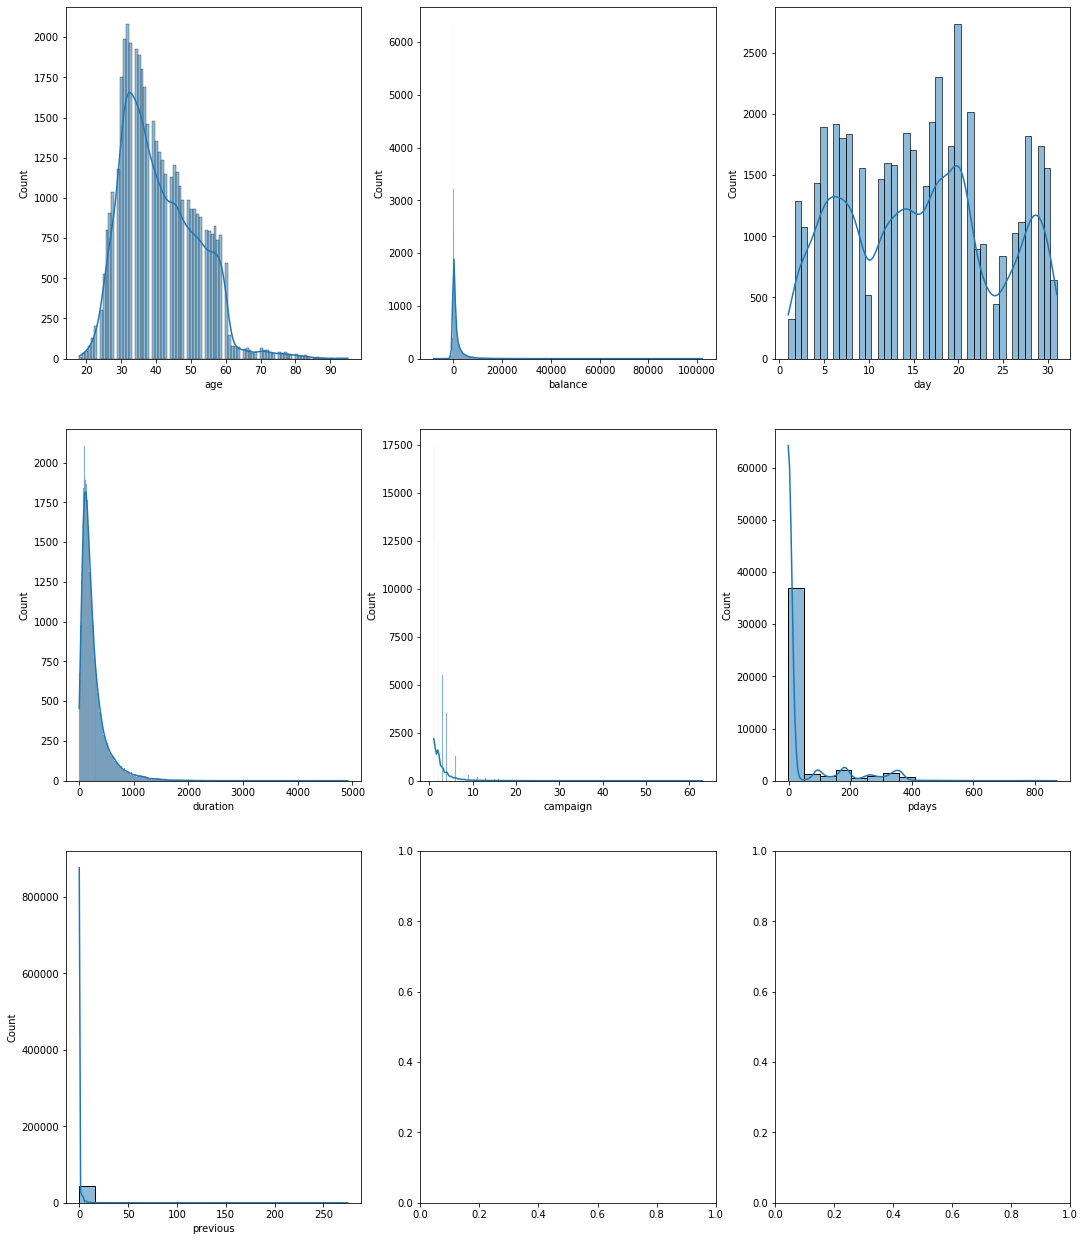

In [63]:
#all distribution plots in a single plot
_,ax = plt.subplots(3,3,figsize=(18,22))
for i in range(len(numericals)):
    sns.histplot(data=bank_data[numericals[i]],ax=ax[i//3][i%3],kde=True)

In [64]:
#sqrt age
#bank_data['age'] = np.sqrt(bank_data['age'])

In [65]:
#IQR
Q1 = bank_data['age'].quantile(0.25)
Q3 = bank_data['age'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 1.5*IQR
Upper_bound = Q3 + 1.5*IQR

In [66]:
#Outliers
bank_data['age'][(bank_data['age'] < Lower_bound) | (bank_data['age'] > Upper_bound)].value_counts()

71    54
72    52
73    44
77    44
75    39
74    37
76    32
80    31
78    30
79    25
83    22
82    19
81    17
86     9
84     9
85     5
87     4
89     3
90     2
95     2
92     2
88     2
93     2
94     1
Name: age, dtype: int64

In [67]:
#drop outliers
bank_data.drop(bank_data[(bank_data['age'] < Lower_bound) | (bank_data['age'] > Upper_bound)].index, inplace=True)

In [68]:
#IQR
Q1 = bank_data['balance'].quantile(0.25)
Q3 = bank_data['balance'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 3*IQR
Upper_bound = Q3 + 3*IQR

In [69]:
bank_data['balance'][(bank_data['balance'] < Lower_bound) | (bank_data['balance'] > Upper_bound)].value_counts().sum()

2422

In [70]:
#drop outliers
bank_data.drop(bank_data[(bank_data['balance'] < Lower_bound) | (bank_data['balance'] > Upper_bound)].index, inplace=True)

In [71]:
#IQR
Q1 = bank_data['duration'].quantile(0.25)
Q3 = bank_data['duration'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 3*IQR
Upper_bound = Q3 + 3*IQR

In [72]:
#outliers
bank_data['duration'][(bank_data['duration'] < Lower_bound) | (bank_data['duration'] > Upper_bound)].value_counts().sum()

1082

In [73]:
#drop outliers
bank_data.drop(bank_data[(bank_data['duration'] < Lower_bound) | (bank_data['duration'] > Upper_bound)].index, inplace=True)

In [74]:
#IQR
Q1 = bank_data['campaign'].quantile(0.25)
Q3 = bank_data['campaign'].quantile(0.75)
IQR = Q3 - Q1
Lower_bound = Q1 - 3*IQR
Upper_bound = Q3 + 3*IQR

In [75]:
#outliers
bank_data['campaign'][(bank_data['campaign'] < Lower_bound) | (bank_data['campaign'] > Upper_bound)].value_counts().sum()

1351

In [76]:
#drop outliers
bank_data.drop(bank_data[(bank_data['campaign'] < Lower_bound) | (bank_data['campaign'] > Upper_bound)].index, inplace=True)

In [77]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
354,59,retired,divorced,others,no,27,no,no,telephone,5,may,347,3,-1,0,failure,no
2046,57,retired,married,others,no,106,no,no,telephone,12,may,836,4,-1,0,nonexistent,no
2723,58,retired,divorced,secondary,no,3111,yes,no,telephone,13,may,166,2,-1,0,nonexistent,no
6966,57,retired,married,others,no,327,yes,no,telephone,28,may,74,2,-1,0,nonexistent,no
9002,59,retired,married,others,no,3940,no,no,telephone,5,jun,48,2,-1,0,nonexistent,no


In [78]:
#convert balance to low moderate AND high
#bank_data['balance'] = bank_data['balance'].apply(lambda x: 'low' if x < 1000 else 'moderate' if x < 10000 else 'high')

In [79]:
#box cox of duration
#from scipy.stats import boxcox
#y,lam = boxcox(bank_data["duration"])
#bank_data["duration"] = y

In [80]:
#box cox transform of campaign
#y,lam = boxcox(bank_data["campaign"])
#bank_data["campaign"] = y

## I think -1 represents that the customer will be contacted tomorrow..

In [81]:
#convert previous to Never if 0 , very low if less than 10, low if less than 50, moderate if less than 100, high if greater than 100
bank_data['previous'] = bank_data['previous'].apply(lambda x: 'Never' if x == 0 else 'very low' if x < 10 else 'low' if x < 50 else 'moderate' if x < 100 else 'high')

In [82]:
#convert pdays to very low if 0, low if less than 10, moderate if less than 50, high if greater than 50
bank_data['pdays'] = bank_data['pdays'].apply(lambda x: 'Planning to contact' if x < 0 else 'recently contacted' if x < 30 else 'long time ago contacted' if x < 200  else 'Very long time ago contacted' if x < 600 else 'never contacted' if x > 999 else "unknown")

In [83]:
bank_data.skew()

C:\Users\test\AppData\Local\Temp/ipykernel_10408/2713462718.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bank_data.skew()


age         0.427314
balance     1.716602
day         0.124528
duration    1.504485
campaign    1.658058
dtype: float64

<AxesSubplot:ylabel='duration'>

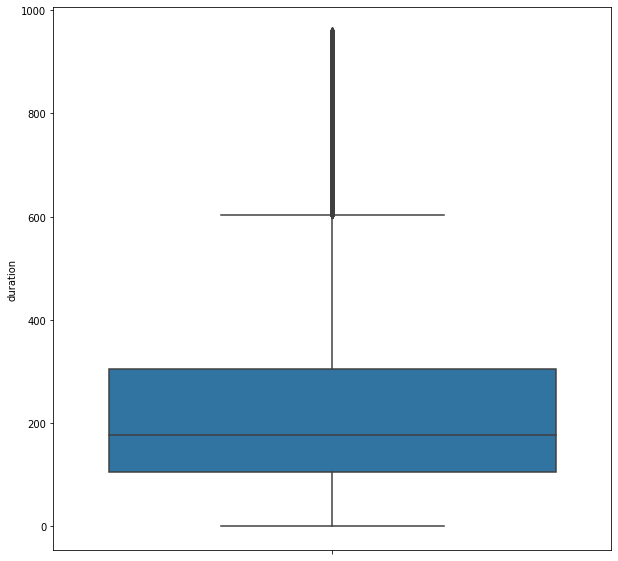

In [84]:
#verically box plot
plt.figure(figsize=(10,10))
sns.boxplot(y='duration', data=bank_data)

<AxesSubplot:xlabel='marital', ylabel='count'>

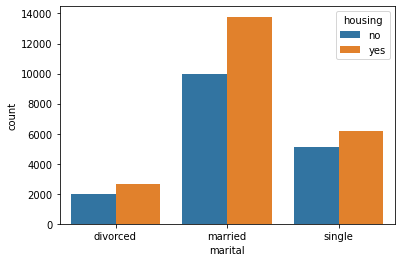

In [85]:
sns.countplot(x="marital", hue="housing", data=bank_data)

### We can say married people have more takes houseloans...

<AxesSubplot:xlabel='job', ylabel='count'>

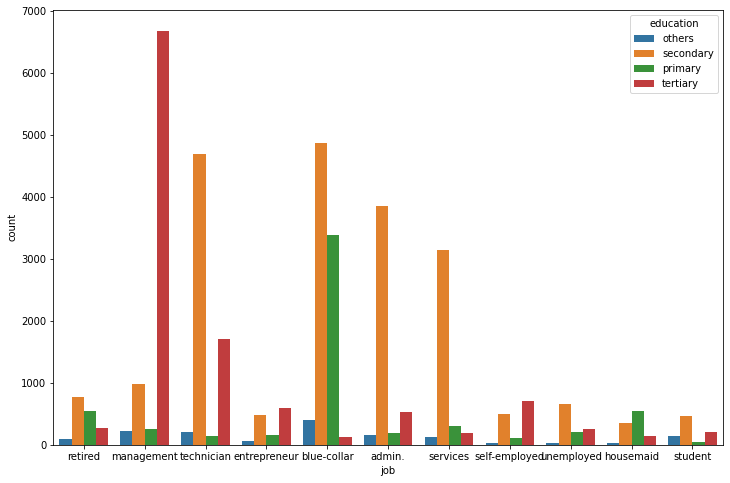

In [86]:
plt.figure(figsize=(12,8))
sns.countplot(x="job", hue="education", data=bank_data)

### Heren we can say in every job highest number people qualification is secondary , but in management there are more people having tertiary education.

<AxesSubplot:xlabel='default', ylabel='count'>

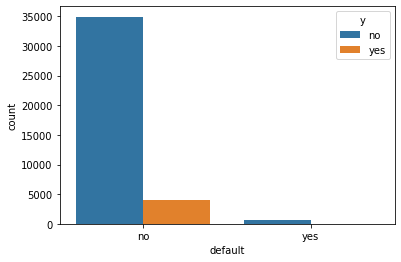

In [87]:
sns.countplot(x="default", hue="y", data=bank_data)

In [88]:
#binning of age
bank_data['age1'] = pd.cut(bank_data['age'], bins=[0,20,30,40,50,60,70])

<AxesSubplot:xlabel='age1', ylabel='duration'>

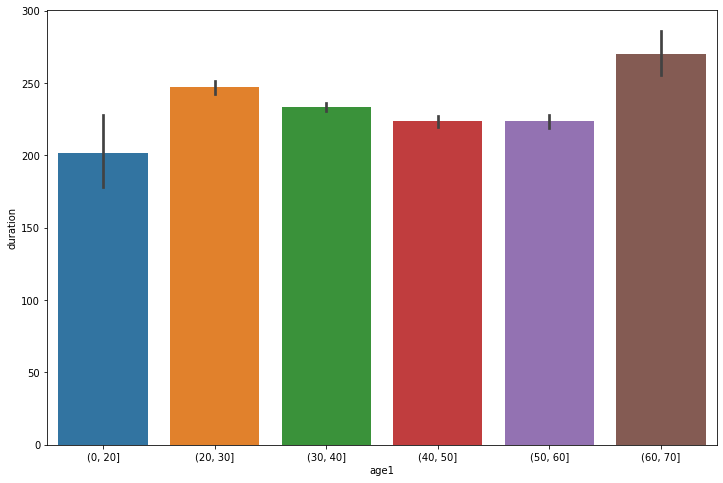

In [89]:
plt.figure(figsize=(12,8))
sns.barplot(x="age1", y="duration", data=bank_data)

<AxesSubplot:xlabel='default', ylabel='balance'>

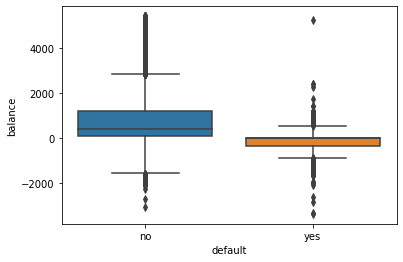

In [90]:
sns.boxplot(x="default", y="balance", data=bank_data)

In [91]:
#rows where pdays is not planning to contact
df = bank_data.loc[bank_data['pdays'] != 'Planning to contact']

<AxesSubplot:xlabel='job', ylabel='count'>

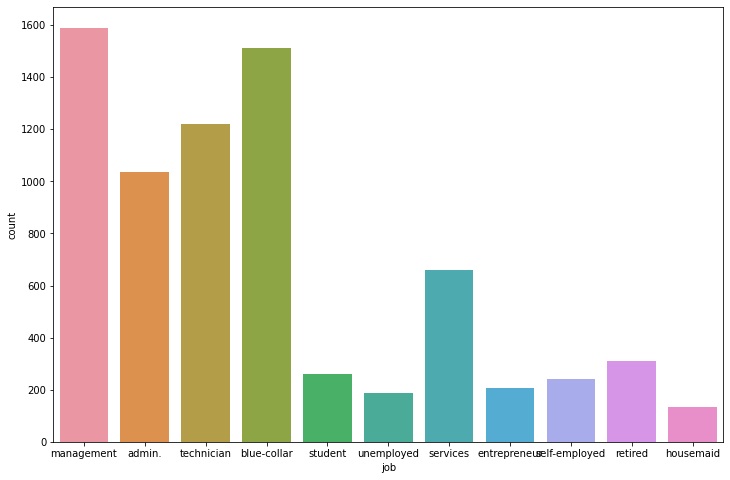

In [92]:
#count of different months in line chart
plt.figure(figsize=(12,8))
sns.countplot(x="job" , data=df)

<AxesSubplot:xlabel='month', ylabel='duration'>

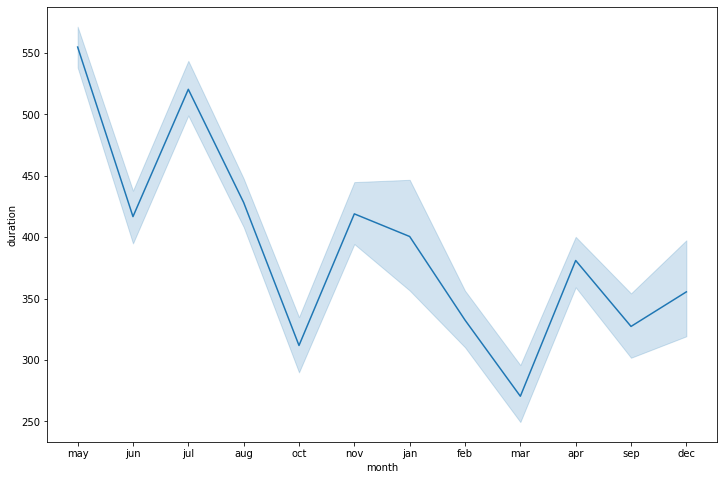

In [155]:
plt.figure(figsize=(12,8))
sns.lineplot(x="month" , y="duration", data=df3)

In [156]:
#rows where month is may
dff = df3.loc[df3['month'] == 'may',:]

<AxesSubplot:xlabel='day', ylabel='campaign'>

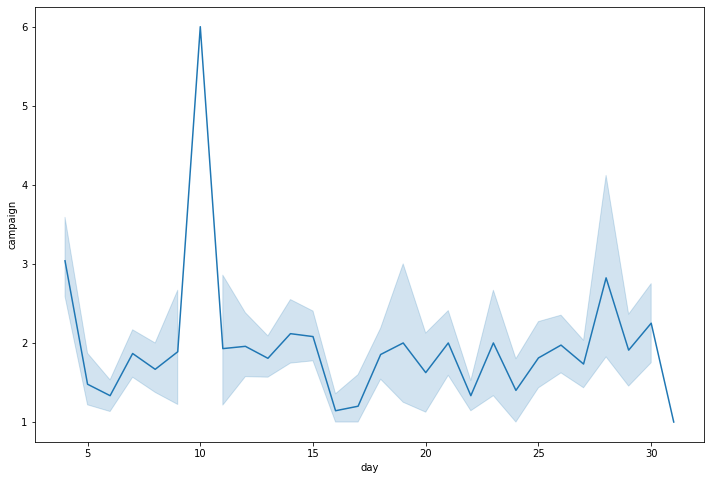

In [157]:
#line plot
plt.figure(figsize=(12,8))
sns.lineplot(x="day" , y="campaign", data=dff)

<AxesSubplot:xlabel='y', ylabel='duration'>

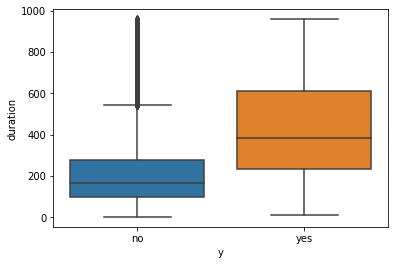

In [150]:
sns.boxplot(x="y", y="duration", data=bank_data)

<AxesSubplot:xlabel='month', ylabel='count'>

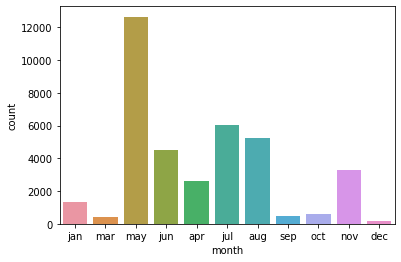

In [159]:
sns.countplot(x="month", data=bank_data)

<AxesSubplot:xlabel='day', ylabel='count'>

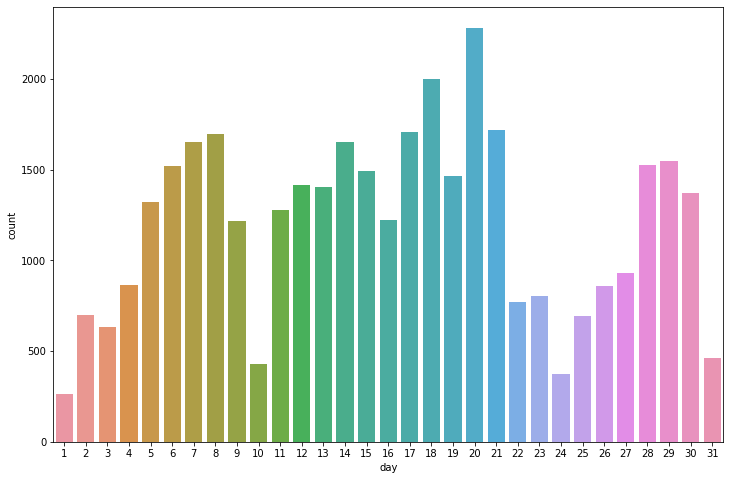

In [161]:
plt.figure(figsize=(12,8))
sns.countplot(x="day", data=bank_data)

<AxesSubplot:xlabel='day', ylabel='duration'>

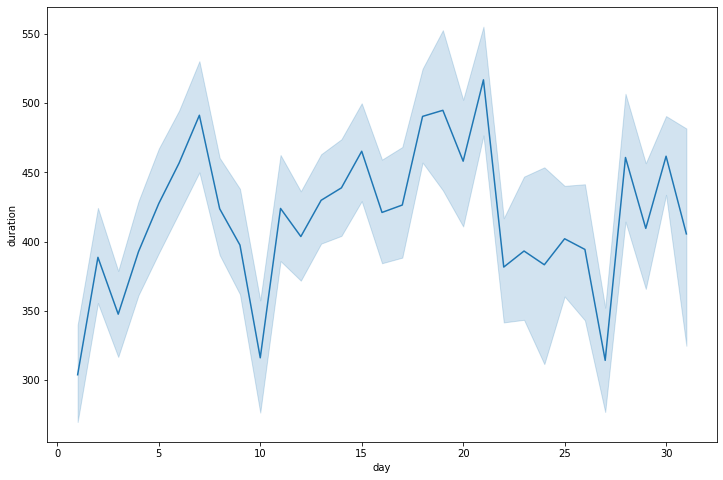

In [158]:
plt.figure(figsize=(12,8))
sns.lineplot(x="day" , y="duration", data=df3)

<AxesSubplot:xlabel='job', ylabel='age'>

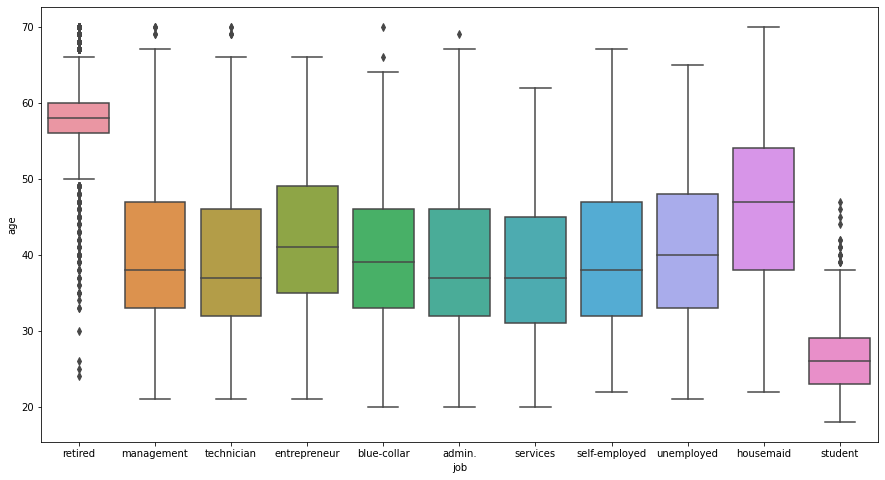

In [98]:
plt.figure(figsize=(15,8))
sns.boxplot(x="job", y="age", data=bank_data)

### Here we can say average age of different jobs

<AxesSubplot:xlabel='contact', ylabel='duration'>

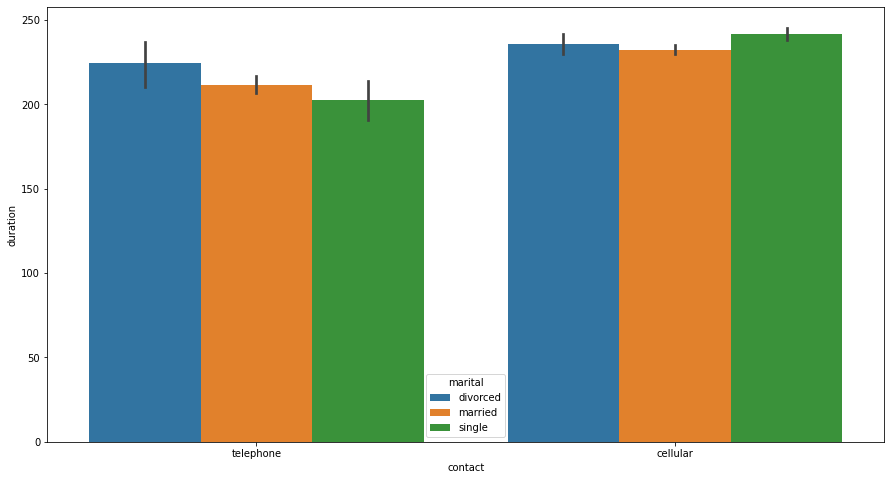

In [99]:
#education vs duation
plt.figure(figsize=(15,8))
sns.barplot(x="contact", y="duration",hue = 'marital', data=bank_data)

### In telephone there are more divorced people have more call duration and in cellular in single people..

<AxesSubplot:xlabel='default', ylabel='balance'>

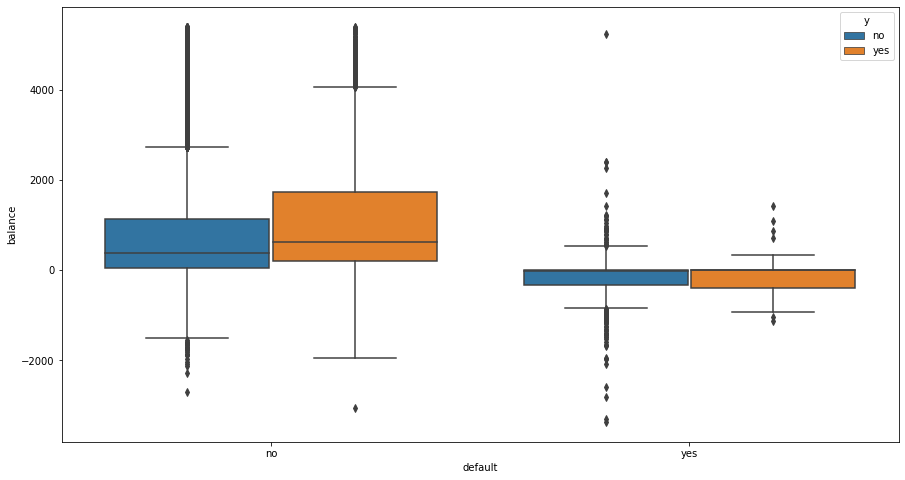

In [100]:
plt.figure(figsize=(15,8))
sns.boxplot(data=bank_data,x='default',y='balance' , hue = 'y')

### Here we can say whose balance is more and no  credit default are more lilely to take susbsription..

<AxesSubplot:xlabel='y', ylabel='duration'>

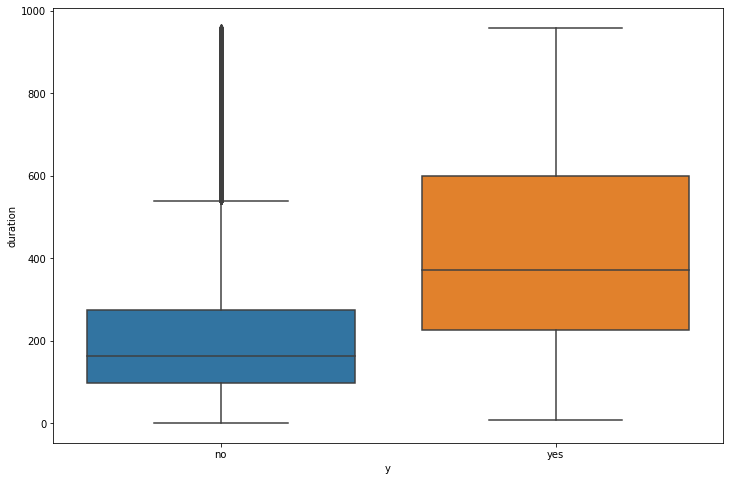

In [101]:
plt.figure(figsize=(12,8))
sns.boxplot(data=bank_data,x='y',y='duration')

### Here we can say which people call duration is more than 400sec ae more likely to take subsciption and whose call duration is less than 200sec are more likely to not take suscription..

<AxesSubplot:xlabel='age', ylabel='campaign'>

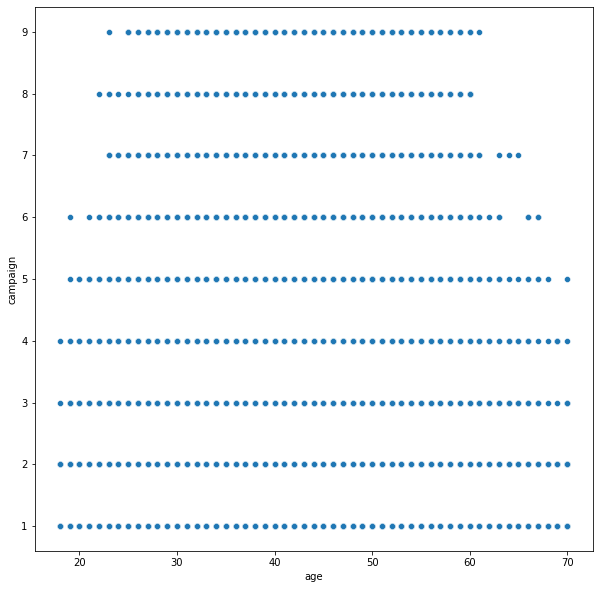

In [102]:
#age vs campaign
_,ax = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(data=bank_data,x='age',y='campaign',ax=ax)

<AxesSubplot:xlabel='age', ylabel='duration'>

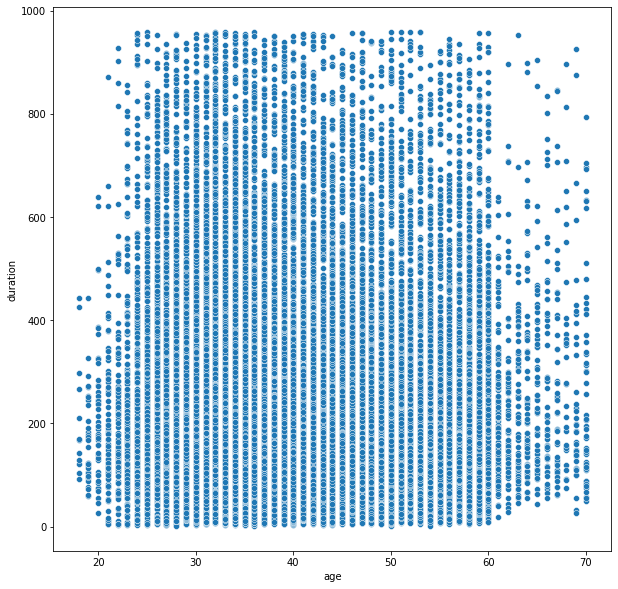

In [103]:
#age vs duration
_,ax = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(data=bank_data,x='age',y='duration',ax=ax)

<AxesSubplot:xlabel='duration', ylabel='campaign'>

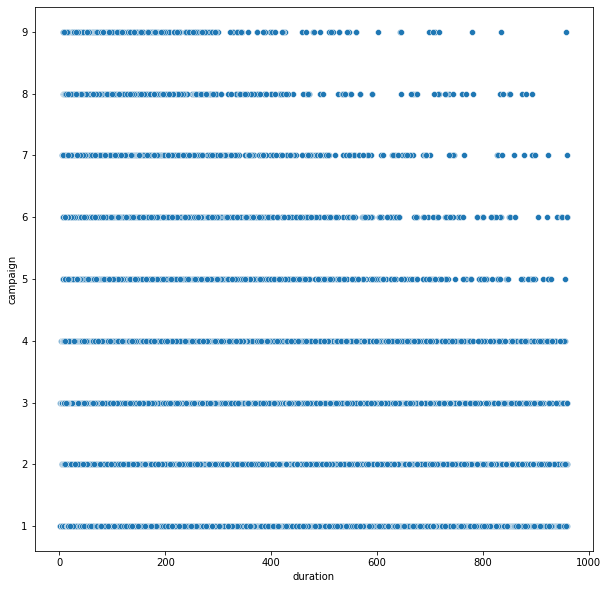

In [104]:
#duration vs campaign
_,ax = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(data=bank_data,x='duration',y='campaign',ax=ax)

<AxesSubplot:xlabel='day', ylabel='campaign'>

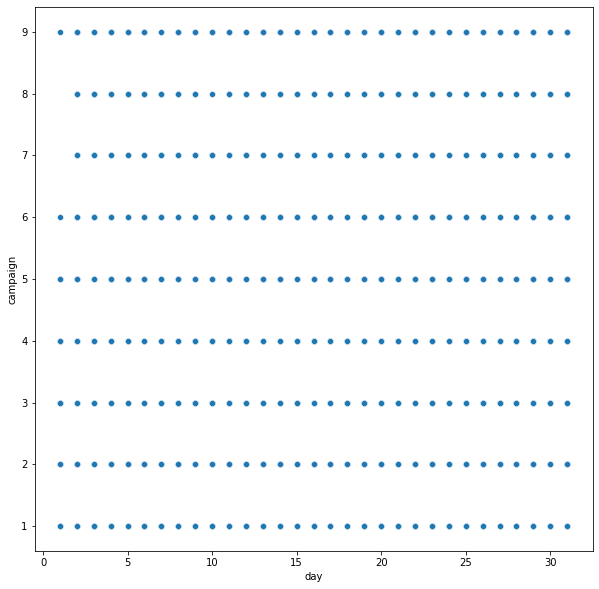

In [105]:
#day vs campaign
_,ax = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(data=bank_data,x='day',y='campaign',ax=ax)

In [106]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age1
354,59,retired,divorced,others,no,27,no,no,telephone,5,may,347,3,Planning to contact,Never,failure,no,"(50, 60]"
2046,57,retired,married,others,no,106,no,no,telephone,12,may,836,4,Planning to contact,Never,nonexistent,no,"(50, 60]"
2723,58,retired,divorced,secondary,no,3111,yes,no,telephone,13,may,166,2,Planning to contact,Never,nonexistent,no,"(50, 60]"
6966,57,retired,married,others,no,327,yes,no,telephone,28,may,74,2,Planning to contact,Never,nonexistent,no,"(50, 60]"
9002,59,retired,married,others,no,3940,no,no,telephone,5,jun,48,2,Planning to contact,Never,nonexistent,no,"(50, 60]"


<AxesSubplot:xlabel='y', ylabel='count'>

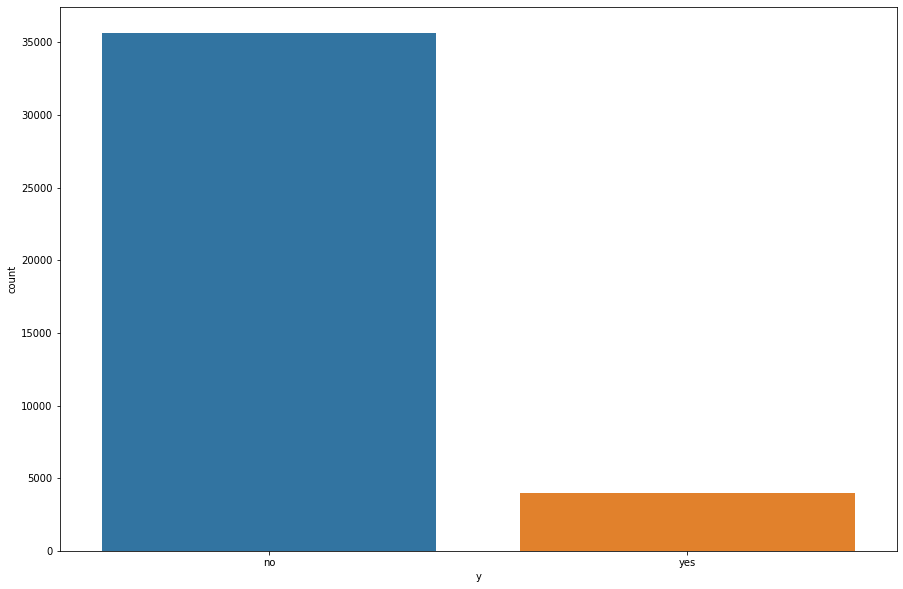

In [107]:
_,ax = plt.subplots(1,1,figsize=(15,10))
sns.countplot(data=bank_data,x='y',ax=ax)


In [108]:
#rows where y is yes
df3 = bank_data[(bank_data['y'] == 'yes')]
df3

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age1
129,55,services,married,secondary,no,2476,yes,no,telephone,5,may,579,1,Planning to contact,Never,success,yes,"(50, 60]"
168,54,admin.,married,tertiary,no,184,no,no,telephone,5,may,673,2,Planning to contact,Never,success,yes,"(50, 60]"
270,42,management,single,tertiary,no,0,yes,yes,cellular,5,may,562,2,Planning to contact,Never,success,yes,"(40, 50]"
457,37,technician,married,secondary,no,1,yes,no,cellular,6,may,608,1,Planning to contact,Never,success,yes,"(30, 40]"
512,55,unemployed,divorced,secondary,no,387,yes,no,telephone,6,may,918,1,Planning to contact,Never,success,yes,"(50, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45188,29,management,single,secondary,no,703,yes,no,cellular,16,nov,236,1,Very long time ago contacted,very low,success,yes,"(20, 30]"
45190,32,blue-collar,married,secondary,no,136,no,no,cellular,16,nov,206,1,long time ago contacted,very low,success,yes,"(30, 40]"
45193,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,long time ago contacted,very low,success,yes,"(20, 30]"
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,long time ago contacted,very low,success,yes,"(60, 70]"


<AxesSubplot:xlabel='education', ylabel='age'>

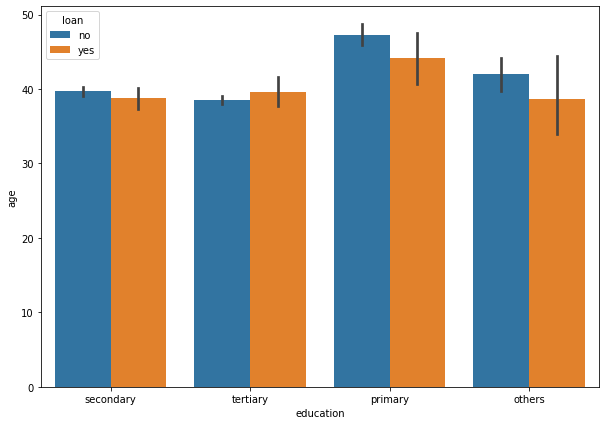

In [109]:
plt.figure(figsize=(10,7))
sns.barplot(data=df3,x='education',y='age',hue='loan')

#### We can say peoples with no loan are high chance to suscribe term deposit , but whose educatation is primary are more likely to subscribe..

In [110]:
#rows where education is primary and other
df0 = df3[(df3['education'] == 'others')]

<AxesSubplot:xlabel='education', ylabel='balance'>

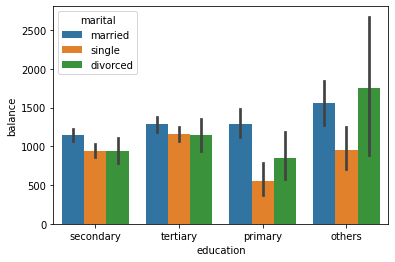

In [111]:

sns.barplot(x='education',y = 'balance',hue = 'marital' ,data=df3)

<AxesSubplot:xlabel='education', ylabel='count'>

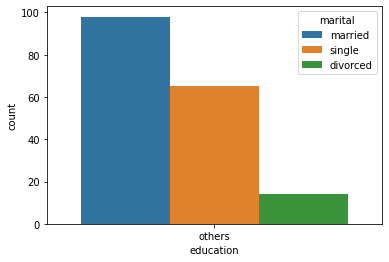

In [112]:
sns.countplot(x='education',hue = 'marital',data=df0)

<AxesSubplot:xlabel='marital', ylabel='age'>

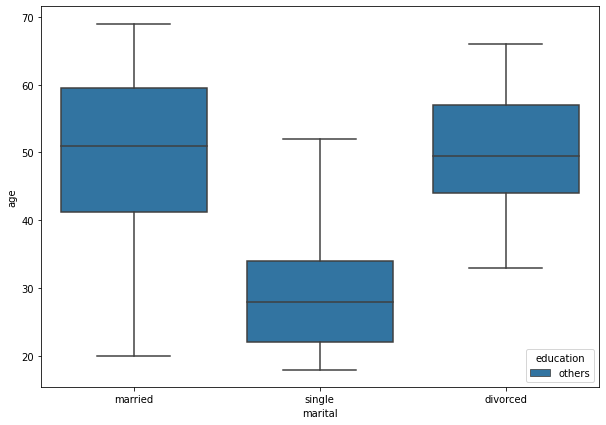

In [113]:
plt.figure(figsize=(10,7))
sns.boxplot(x='marital',y='age',hue='education',data=df0)

In [114]:
#rows where marital is married
df11 = df3[(df3['marital'] == 'married')]

<AxesSubplot:xlabel='marital', ylabel='duration'>

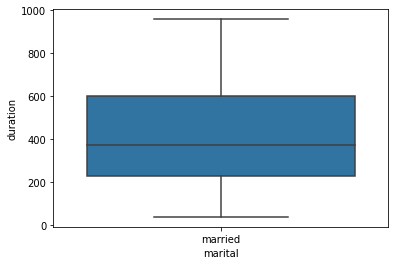

In [115]:
sns.boxplot(x='marital',y='duration',data=df11)

In [116]:
dfff = df3[(df3['previous'] == 'Never')]

In [117]:
#rows where job is blue-collar
dfff1 = dfff[(dfff['job'] == 'blue-collar')]

<AxesSubplot:xlabel='job', ylabel='count'>

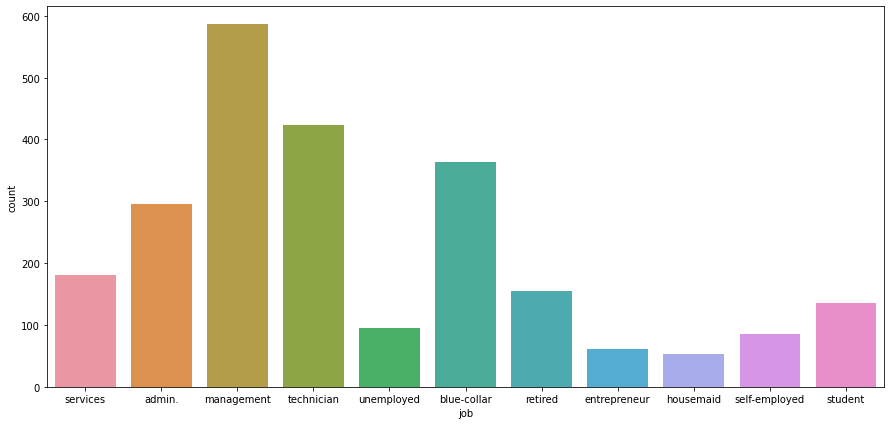

In [118]:
plt.figure(figsize=(15,7))
sns.countplot(x='job',data=dfff)

In [119]:
#rows where job is blue-collar,management,technician
dfff2 = dfff[(dfff['job'] == 'blue-collar') | (dfff['job'] == 'management') | (dfff['job'] == 'technician')]

<AxesSubplot:xlabel='job', ylabel='duration'>

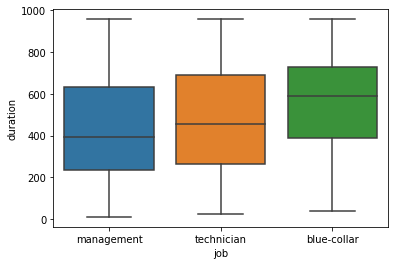

In [120]:
sns.boxplot(x='job',y='duration',data=dfff2)

<AxesSubplot:xlabel='job', ylabel='age'>

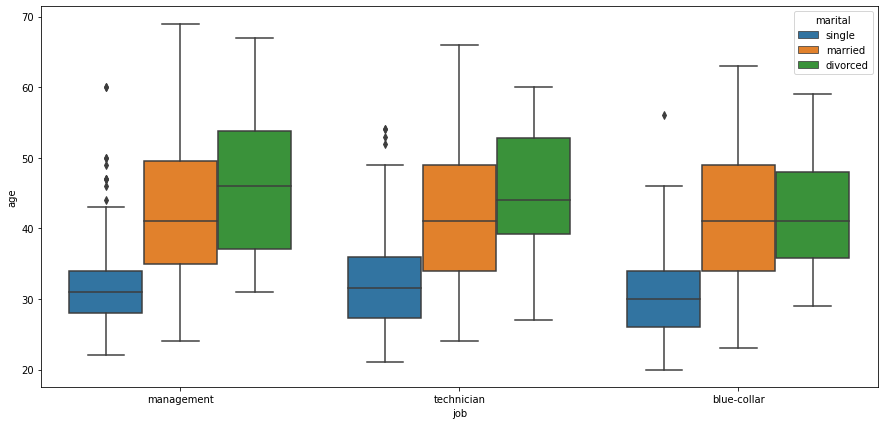

In [121]:
plt.figure(figsize=(15,7))
sns.boxplot(x='job',y='age', hue ="marital",data=dfff2)

<AxesSubplot:xlabel='job', ylabel='duration'>

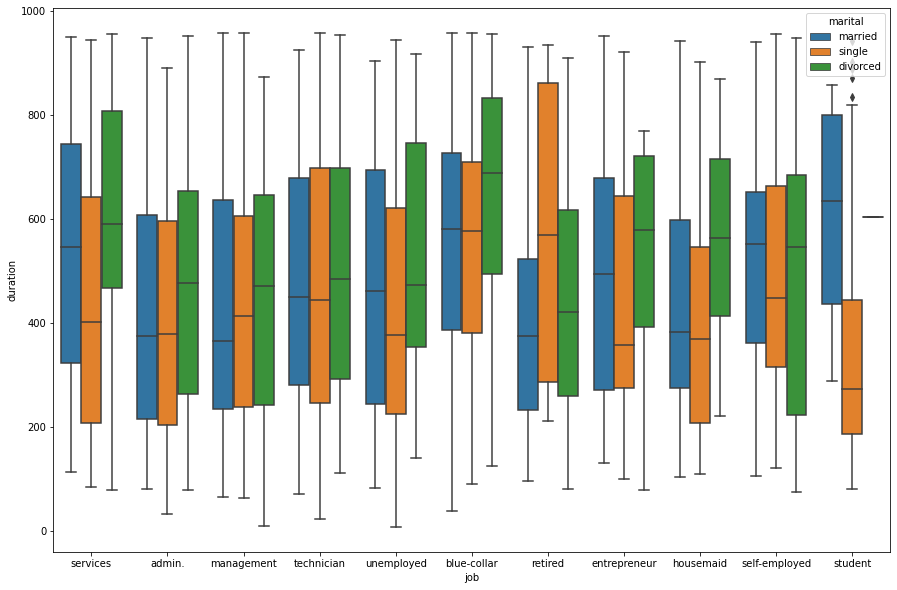

In [122]:
plt.figure(figsize=(15,10))
sns.boxplot(data=dfff,x='job',y='duration',hue='marital')

### Blue colar and service based job people who are divorsed and if their talking duation is likely more then it is more chance to take term deposit

<AxesSubplot:xlabel='age1', ylabel='duration'>

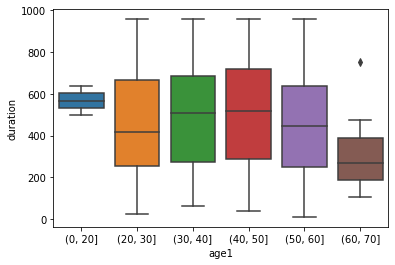

In [123]:
sns.boxplot(x='age1',y='duration',data=dfff2)


<AxesSubplot:xlabel='education', ylabel='age'>

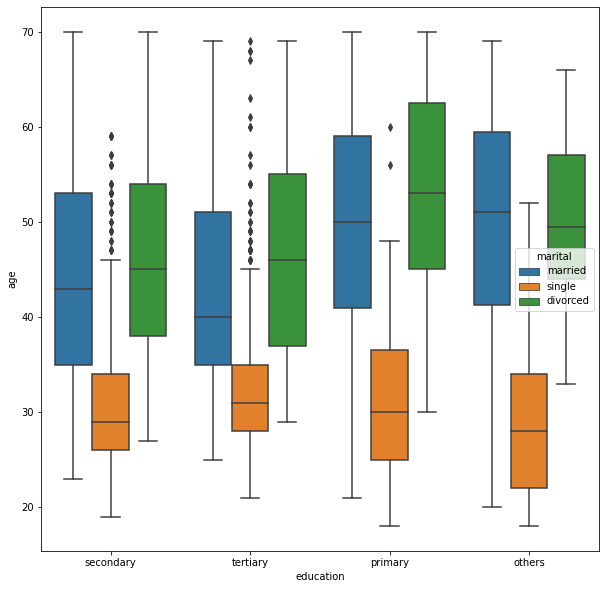

In [124]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df3,x='education',y='age',hue='marital')

### We can say divorced people are more likely to subscribe in every education with age more than 40 , but we can say whose age is more than 50 , divorsed and having less education are highestchance to subscribe..

In [125]:
df3.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age1
129,55,services,married,secondary,no,2476,yes,no,telephone,5,may,579,1,Planning to contact,Never,success,yes,"(50, 60]"
168,54,admin.,married,tertiary,no,184,no,no,telephone,5,may,673,2,Planning to contact,Never,success,yes,"(50, 60]"
270,42,management,single,tertiary,no,0,yes,yes,cellular,5,may,562,2,Planning to contact,Never,success,yes,"(40, 50]"
457,37,technician,married,secondary,no,1,yes,no,cellular,6,may,608,1,Planning to contact,Never,success,yes,"(30, 40]"
512,55,unemployed,divorced,secondary,no,387,yes,no,telephone,6,may,918,1,Planning to contact,Never,success,yes,"(50, 60]"


<AxesSubplot:xlabel='previous', ylabel='count'>

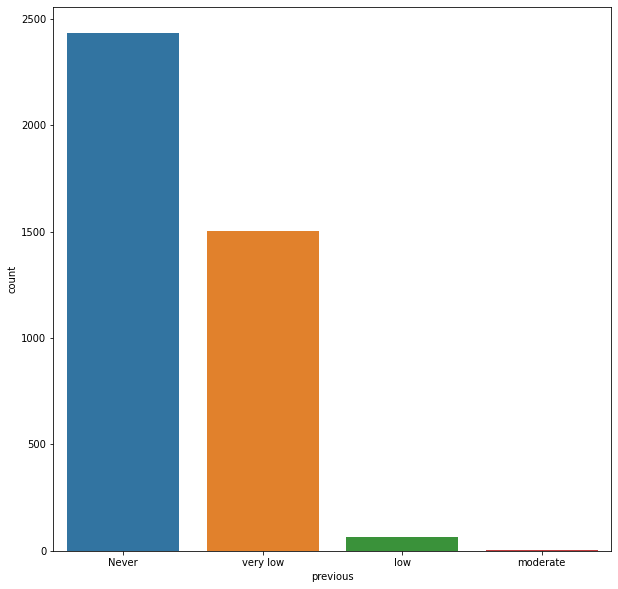

In [126]:
plt.figure(figsize=(10,10))
sns.countplot(data=df3,x='previous')

### Here we can say although people having loan , but still with more call duration they can be subscribed to term deposit and there are more chance for people which are successful in previous market campaign

In [127]:
#rows where y is no
df4 = bank_data[(bank_data['y'] == 'no')]
df4

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age1
354,59,retired,divorced,others,no,27,no,no,telephone,5,may,347,3,Planning to contact,Never,failure,no,"(50, 60]"
2046,57,retired,married,others,no,106,no,no,telephone,12,may,836,4,Planning to contact,Never,nonexistent,no,"(50, 60]"
2723,58,retired,divorced,secondary,no,3111,yes,no,telephone,13,may,166,2,Planning to contact,Never,nonexistent,no,"(50, 60]"
6966,57,retired,married,others,no,327,yes,no,telephone,28,may,74,2,Planning to contact,Never,nonexistent,no,"(50, 60]"
9002,59,retired,married,others,no,3940,no,no,telephone,5,jun,48,2,Planning to contact,Never,nonexistent,no,"(50, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45183,70,retired,married,primary,no,324,no,no,cellular,15,nov,78,1,long time ago contacted,very low,success,no,"(60, 70]"
45184,63,retired,married,secondary,no,1495,no,no,cellular,16,nov,138,1,recently contacted,very low,success,no,"(60, 70]"
45189,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,long time ago contacted,very low,failure,no,"(20, 30]"
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,long time ago contacted,very low,failure,no,"(50, 60]"


<AxesSubplot:xlabel='education', ylabel='count'>

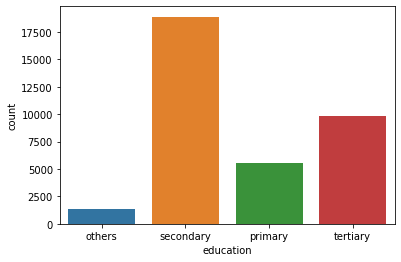

In [128]:
sns.countplot(x='education',data=df4)

In [129]:
#rows where education is secondary
df5 = df4[(df4['education'] == 'secondary')]

<AxesSubplot:xlabel='age1', ylabel='count'>

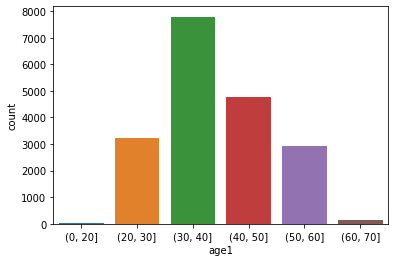

In [130]:
sns.countplot(x='age1',data=df5)

<AxesSubplot:xlabel='marital', ylabel='age'>

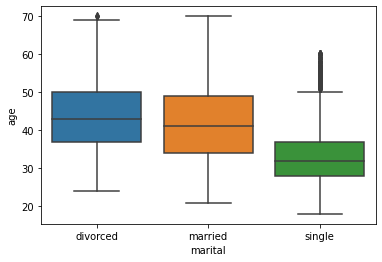

In [131]:
sns.boxplot(x='marital',y='age',data=df5)

In [132]:
#rows where marital is single
df6 = df5[(df5['marital'] == 'single')]

<AxesSubplot:xlabel='marital', ylabel='duration'>

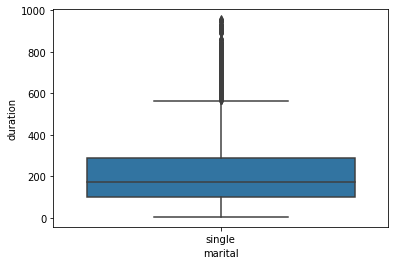

In [133]:
sns.boxplot(x='marital',y='duration',data=df6)

<AxesSubplot:xlabel='job', ylabel='age'>

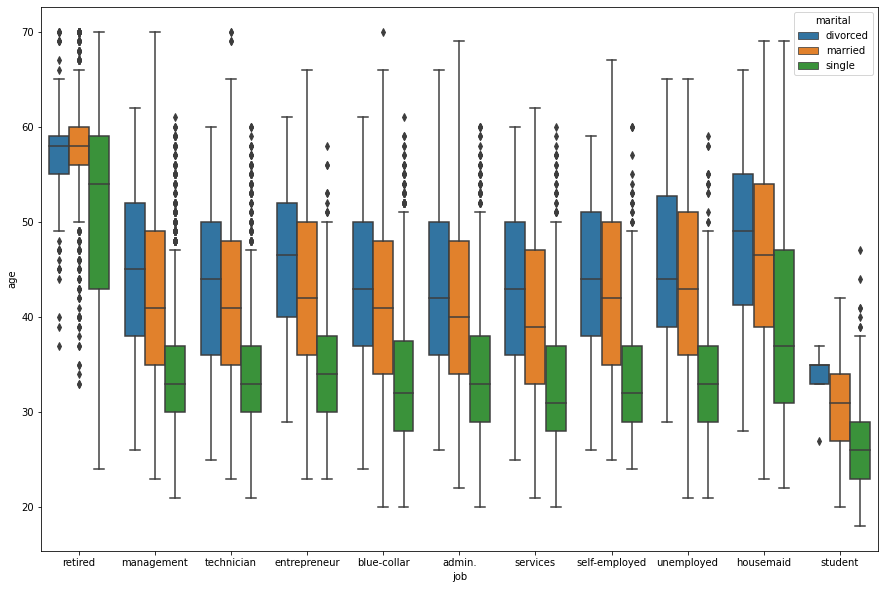

In [134]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df4,x='job',y='age',hue='marital')

### Here we can say retired persons with age more than 55 are mostly don't take subscriptions and basically divorsed personsare more ....

<AxesSubplot:xlabel='education', ylabel='balance'>

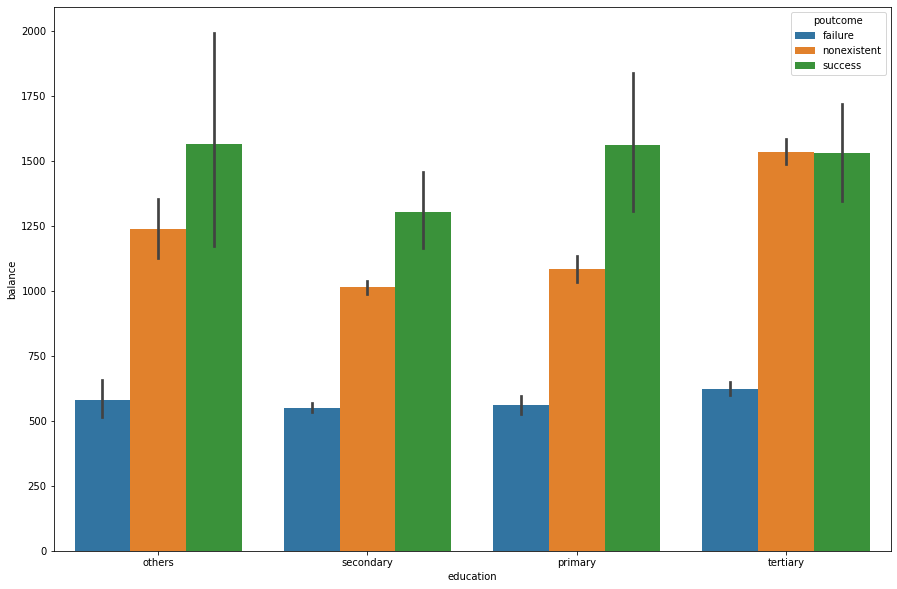

In [135]:
plt.figure(figsize=(15,10))
sns.barplot(data=df4,x='education',y='balance',hue='poutcome')

### Here we can say people having more balance and which were successed in previous campaign are more likely to not take subscription again in every eduacational field..

### 

# Social and economic context attributes

## cons.conf.idx: consumer confidence index - monthly indicator 

### We can take balance and can predict the measures how optimistic or pessimistic consumers according to their bank balance.. Like wise if their bank balance is more having good __CCI__ and those who are having low balance in their account are bad __CCI__ ..

In [136]:
bank_data['CCI'] = bank_data['balance'].apply(lambda x: 'Very good' if x > 5000 else 'Good' if x > 3000 else 'Average' if x < 1000  else 'Below Average' if x > 300 else 'Bad' if x < 300 else "Very Bad" if x < 0 else "unknown")

In [137]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age1,CCI
354,59,retired,divorced,others,no,27,no,no,telephone,5,may,347,3,Planning to contact,Never,failure,no,"(50, 60]",Average
2046,57,retired,married,others,no,106,no,no,telephone,12,may,836,4,Planning to contact,Never,nonexistent,no,"(50, 60]",Average
2723,58,retired,divorced,secondary,no,3111,yes,no,telephone,13,may,166,2,Planning to contact,Never,nonexistent,no,"(50, 60]",Good
6966,57,retired,married,others,no,327,yes,no,telephone,28,may,74,2,Planning to contact,Never,nonexistent,no,"(50, 60]",Average
9002,59,retired,married,others,no,3940,no,no,telephone,5,jun,48,2,Planning to contact,Never,nonexistent,no,"(50, 60]",Good


## emp.var.rate: employment variation rate - quarterly indicator

### I think we can take job column to derive employment variation rate by assuming how much people are working on a perticular job devided by total people..

In [138]:
#rows where month is jan,fab,mar
df5 = bank_data[(bank_data['month'] == 'jan') | (bank_data['month'] == 'fab') | (bank_data['month'] == 'mar')]
df6 = bank_data[(bank_data['month'] == 'apr') | (bank_data['month'] == 'may') | (bank_data['month'] == 'jun')]
df7 = bank_data[(bank_data['month'] == 'jul') | (bank_data['month'] == 'aug') | (bank_data['month'] == 'sep')]
df8 = bank_data[(bank_data['month'] == 'oct') | (bank_data['month'] == 'nov') | (bank_data['month'] == 'dec')]

In [139]:
df5['job'].value_counts() /df5['job'].value_counts().sum()

management       0.233353
technician       0.173247
admin.           0.139069
blue-collar      0.114909
services         0.088391
unemployed       0.063052
retired          0.061874
student          0.039481
self-employed    0.038303
housemaid        0.024750
entrepreneur     0.023571
Name: job, dtype: float64

In [140]:
#change the emp_var_rate
df5['emp_var_rate'] = df5['job'].apply(lambda x: 0.233353 if x == 'management' else 0.173247 if x == 'technician' else 0.139069 if x == 'admin.' else 0.114909 if x == 'blue-collar' else 0.023571 if x == 'entrepreneur' else 0.061874 if x == 'retired' else 0.088391 if x == 'services' else 0.063052 if x == 'unemployed' else 0.039481 if x == 'student' else 0.038303 if x == 'self-employed' else 0.024750 if x == 'housemaid' else "unknown")

C:\Users\test\AppData\Local\Temp/ipykernel_10408/742257082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['emp_var_rate'] = df5['job'].apply(lambda x: 0.233353 if x == 'management' else 0.173247 if x == 'technician' else 0.139069 if x == 'admin.' else 0.114909 if x == 'blue-collar' else 0.023571 if x == 'entrepreneur' else 0.061874 if x == 'retired' else 0.088391 if x == 'services' else 0.063052 if x == 'unemployed' else 0.039481 if x == 'student' else 0.038303 if x == 'self-employed' else 0.024750 if x == 'housemaid' else "unknown")


In [141]:
df6['job'].value_counts() /df6['job'].value_counts().sum()

blue-collar      0.295467
management       0.161504
technician       0.144424
admin.           0.128859
services         0.111223
retired          0.033958
entrepreneur     0.032089
self-employed    0.029511
unemployed       0.022386
housemaid        0.020921
student          0.019657
Name: job, dtype: float64

In [142]:
#change the emp_var_rate
df6['emp_var_rate'] = df6['job'].apply(lambda x: 0.161504 if x == 'management' else 0.144424 if x == 'technician' else 0.128859 if x == 'admin.' else 0.295467 if x == 'blue-collar' else 0.032089 if x == 'entrepreneur' else 0.033958 if x == 'retired' else 0.111223 if x == 'services' else 0.022386 if x == 'unemployed' else 0.019657 if x == 'student' else 0.029511 if x == 'self-employed' else 0.020921 if x == 'housemaid' else "unknown")

C:\Users\test\AppData\Local\Temp/ipykernel_10408/2203876762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['emp_var_rate'] = df6['job'].apply(lambda x: 0.161504 if x == 'management' else 0.144424 if x == 'technician' else 0.128859 if x == 'admin.' else 0.295467 if x == 'blue-collar' else 0.032089 if x == 'entrepreneur' else 0.033958 if x == 'retired' else 0.111223 if x == 'services' else 0.022386 if x == 'unemployed' else 0.019657 if x == 'student' else 0.029511 if x == 'self-employed' else 0.020921 if x == 'housemaid' else "unknown")


In [143]:
df7['job'].value_counts() /df7['job'].value_counts().sum()

management       0.253067
technician       0.218729
blue-collar      0.151500
admin.           0.099438
services         0.079073
retired          0.053340
housemaid        0.041922
self-employed    0.034680
entrepreneur     0.028204
unemployed       0.021813
student          0.018234
Name: job, dtype: float64

In [144]:
#change the emp_var_rate
df7['emp_var_rate'] = df7['job'].apply(lambda x: 0.253067 if x == 'management' else 0.218729 if x == 'technician' else 0.099438 if x == 'admin.' else 0.151500 if x == 'blue-collar' else 0.028204 if x == 'entrepreneur' else 0.053340 if x == 'retired' else 0.079073 if x == 'services' else 0.021813 if x == 'unemployed' else 0.018234 if x == 'student' else 0.034680 if x == 'self-employed' else 0.041922 if x == 'housemaid' else "unknown")

C:\Users\test\AppData\Local\Temp/ipykernel_10408/2109514946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['emp_var_rate'] = df7['job'].apply(lambda x: 0.253067 if x == 'management' else 0.218729 if x == 'technician' else 0.099438 if x == 'admin.' else 0.151500 if x == 'blue-collar' else 0.028204 if x == 'entrepreneur' else 0.053340 if x == 'retired' else 0.079073 if x == 'services' else 0.021813 if x == 'unemployed' else 0.018234 if x == 'student' else 0.034680 if x == 'self-employed' else 0.041922 if x == 'housemaid' else "unknown")


In [145]:
df8['job'].value_counts() /df8['job'].value_counts().sum()

management       0.267554
technician       0.159153
blue-collar      0.142646
admin.           0.120227
services         0.071693
entrepreneur     0.055925
self-employed    0.051737
retired          0.044346
unemployed       0.037694
housemaid        0.024637
student          0.024390
Name: job, dtype: float64

In [146]:
#change the emp_var_rate
df8['emp_var_rate'] = df8['job'].apply(lambda x: 0.267554 if x == 'management' else 0.159153 if x == 'technician' else 0.120227 if x == 'admin.' else 0.142646 if x == 'blue-collar' else 0.055925 if x == 'entrepreneur' else 0.044346 if x == 'retired' else 0.071693 if x == 'services' else 0.037694 if x == 'unemployed' else 0.024390 if x == 'student' else 0.051737 if x == 'self-employed' else 0.024637 if x == 'housemaid' else "unknown")

C:\Users\test\AppData\Local\Temp/ipykernel_10408/3174693858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['emp_var_rate'] = df8['job'].apply(lambda x: 0.267554 if x == 'management' else 0.159153 if x == 'technician' else 0.120227 if x == 'admin.' else 0.142646 if x == 'blue-collar' else 0.055925 if x == 'entrepreneur' else 0.044346 if x == 'retired' else 0.071693 if x == 'services' else 0.037694 if x == 'unemployed' else 0.024390 if x == 'student' else 0.051737 if x == 'self-employed' else 0.024637 if x == 'housemaid' else "unknown")


In [147]:
#concat the data
bank_data = pd.concat([df5,df6,df7,df8])

In [148]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age1,CCI,emp_var_rate
42591,38,blue-collar,married,secondary,no,863,no,no,cellular,6,jan,78,1,Planning to contact,Never,failure,no,"(30, 40]",Average,0.114909
42592,29,services,single,secondary,no,814,no,no,cellular,6,jan,54,1,Planning to contact,Never,failure,no,"(20, 30]",Average,0.088391
42593,51,technician,divorced,tertiary,no,363,yes,no,telephone,7,jan,7,1,Planning to contact,Never,failure,no,"(50, 60]",Average,0.173247
42594,33,admin.,divorced,secondary,no,212,yes,no,cellular,7,jan,23,1,Planning to contact,Never,failure,no,"(30, 40]",Average,0.139069
42595,45,unemployed,married,secondary,no,891,yes,no,cellular,7,jan,118,1,Planning to contact,Never,success,yes,"(40, 50]",Average,0.063052
